1. Create plot with (0,0) in the middle 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

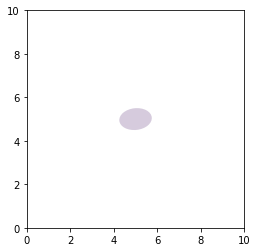

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np

def paint_ellipse(xy, width, height, angle=0):
  """
  xy : (float, float) - xy coordinates of ellipse centre.
  width : float - Total length (diameter) of horizontal axis.
  height : float - Total length (diameter) of vertical axis.
  angle : scalar, optional - Rotation in degrees anti-clockwise.
  """
  ellipse = pt.Ellipse(xy, width, height, angle)
  fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

  ax.add_artist(ellipse)
  ellipse.set_clip_box(ax.bbox)
  ellipse.set_alpha(np.random.rand())
  ellipse.set_facecolor(np.random.rand(3))

  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)

  plt.show()

paint_ellipse((5,5), 1.5, 1, 2*np.pi)


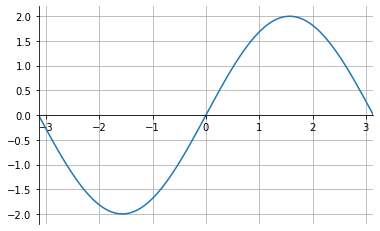

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()

x = np.linspace(-np.pi, np.pi, 100)
y = 2*np.sin(x)

def plot(x,y):
  ax = plt.gca()

  ax.plot(x, y)
  ax.grid(True)
  #ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  plt.xlim(-np.pi,np.pi)

  #plt.savefig("CenterOriginMatplotlib01.png")
  plt.show()

plot(x,y)

2. Draw a circle (polar coordinates)

The matplotlib.pyplot module contains a function `polar()`, which can be used for plotting curves in polar coordinates.

Syntax : matplotlib.pyplot.polar(theta, r, **kwargs)

Parameters :
- theta = angle
- r = distance

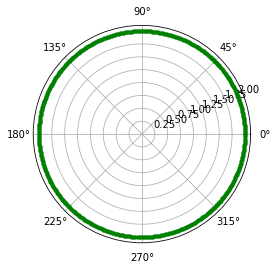

In [ ]:
#Example 
# setting the axes projection as polar 
plt.axes(projection = 'polar') 

# setting the radius 
r = 2

# creating an array containing the 
# radian values 
rads = np.arange(0, (2 * np.pi), 0.01) 

# plotting the circle 
for rad in rads: 
	plt.polar(rad, r, 'g.') 

# display the Polar plot 
plt.show() 

Let's define a function 

In [ ]:
def plot_polar(rads, radius = 1, color = "g."):
  """
  Input:
    - radius: (fixed radius)
    - radians: (numpy array with degrees in radians)
    - color: color of the plot
  Output:
    - Polar Plot
  """
  plt.rcParams["figure.figsize"] = (20,7)
  plt.axes(projection = 'polar') 

  # plotting the circle 
  for rad in rads: 
    plt.polar(rad, radius, color) 

  # display the Polar plot 
  plt.show() 

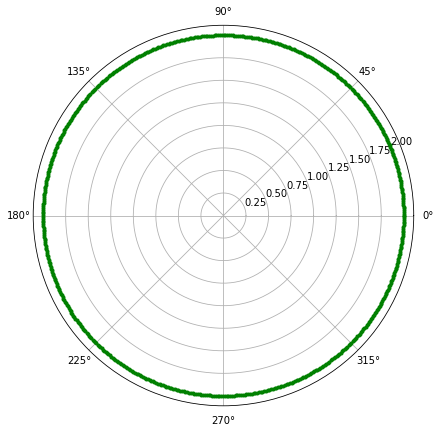

In [ ]:
rads = np.arange(0, 2* np.pi, 0.01)
radius = 2
plot_polar(rads, radius)

3. Draw an ellipse within the circle 

4. Gather Earth's orbital data

- mean distance from Sun: 	149,598,262 km (1.0 AU)
- eccentricity of orbit: 	0.0167
- inclination of orbit to ecliptic: 	0.000°
- Earth year (sidereal period of revolution): 	365.256 days
- mean orbital velocity:	29.78 km/sec

`Source:` 

https://www.britannica.com/place/Earth/Basic-planetary-data

5. Draw Earth's orbit around the sun with coordinates (0,0)


6. Calculate the Eccentric anomaly (E)
- $E = arccos(x/a)$, with a being the semimajor axis
- $E = arcsin(y/b)$, with b being the semiminor axis

In [ ]:
a = 149598023  # semi-major axis in km / 1 AU
x = np.arange(0, 2* np.pi, 0.1)

def eccentric_anomaly(a, x):
  """
  Input:
    - x = position of orbiting element (Numpy array)
    - a = semi-major-axis

  Output:
    - E = Eccentric anomaly 
  """

  E = np.arccos(x/a)
  
  return E

eccentric_anomaly(1, x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  


array([1.57079633, 1.47062891, 1.36943841, 1.26610367, 1.15927948,
       1.04719755, 0.92729522, 0.79539883, 0.64350111, 0.45102681,
       0.        ,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])

7. Calculate radius r 
- use eccentricity e and
- Eccentric anomaly 
- $r = a*(1 - e * cos(E))$



In [ ]:
e = 0.0167086 # Eccentricity of the Earth's orbit

def radius(E, e, a):
  """
  Input:
    - E = Eccentric anomaly 
    - e = eccentricity 
    - a = semi-major-axis

  Output:
    - r = radius at given point
  """

  r = a * (1 - e * np.cos(E))

  return r

r = radius(E,e,a)

8. Calculate true anomaly theta
(located at the focus of the ellipse)
- $tan (\frac{theta}{2}) = sqrt(\frac{(1 + e)}{(1 - e)}) * tan(\frac{E}{2})$
- $r = \frac{a * (1-e^2)}{1+ e * cos(theta)}$
- $theta = arccos((\frac{a * ( 1 - e^2)}{r} - 1)/e)$

In [ ]:
def true_anomaly(a, e, r):
  """
  Input:
    - e = eccentricity 
    - a = semi-major-axis
    - r = radius at given point
  
  Output:
    - theta = true anomaly
  """

  theta = np.arccos((a * (1- e**2) / r - 1) / e)

  return theta

9. Calculate the mean anomaly 
- $M = E - e * sin(E)$

In [ ]:
def mean_anomaly(E, e):
  """
  Input:
    - e = eccentricity 
    - E = Eccentric anomaly  
  Output:
    - M = mean anomaly
  """

  M = E- e* sin(E)

  return M

10. Calculate radial velocity

- $V_r = K *[cos(theta + w_*) + e* cos(w_*)] + gamma$

w  = The longitude of the periastron* of the star

In [ ]:
# w = 

def radial_velocity(K, theta, w, gamma ):
  

# Python turtle

https://fiftyexamples.readthedocs.io/en/latest/gravity.html

In [ ]:
#!/usr/bin/env python3

import math
from turtle import *
import tkinter as tk

# The gravitational constant G
G = 6.67428e-11

# Assumed scale: 100 pixels = 1AU.
AU = (149.6e6 * 1000)     # 149.6 million km, in meters.
SCALE = 250 / AU

class Body(Turtle):
    """Subclass of Turtle representing a gravitationally-acting body.

    Extra attributes:
    mass : mass in kg
    vx, vy: x, y velocities in m/s
    px, py: x, y positions in m
    """
    
    name = 'Body'
    mass = None
    vx = vy = 0.0
    px = py = 0.0
    
    def attraction(self, other):
        """(Body): (fx, fy)

        Returns the force exerted upon this body by the other body.
        """
        # Report an error if the other object is the same as this one.
        if self is other:
            raise ValueError("Attraction of object %r to itself requested"
                             % self.name)

        # Compute the distance of the other body.
        sx, sy = self.px, self.py
        ox, oy = other.px, other.py
        dx = (ox-sx)
        dy = (oy-sy)
        d = math.sqrt(dx**2 + dy**2)

        # Report an error if the distance is zero; otherwise we'll
        # get a ZeroDivisionError exception further down.
        if d == 0:
            raise ValueError("Collision between objects %r and %r"
                             % (self.name, other.name))

        # Compute the force of attraction
        f = G * self.mass * other.mass / (d**2)

        # Compute the direction of the force.
        theta = math.atan2(dy, dx) # Returns the angle whose tangent is the quotient of two specified numbers.
        fx = math.cos(theta) * f
        fy = math.sin(theta) * f
        return fx, fy

def update_info(step, bodies):
    """(int, [Body])
    
    Displays information about the status of the simulation.
    """
    print('Step #{}'.format(step))
    for body in bodies:
        s = '{:<8}  Pos.={:>6.2f} {:>6.2f} Vel.={:>10.3f} {:>10.3f}'.format(
            body.name, body.px/AU, body.py/AU, body.vx, body.vy)
        print(s)
    print()

def loop(bodies):
    """([Body])

    Never returns; loops through the simulation, updating the
    positions of all the provided bodies.
    """
    timestep = 24*3600  # One day
    
    for body in bodies:
        body.penup()
        body.hideturtle()

    step = 1
    while True:
        update_info(step, bodies)
        step += 1

        force = {}
        for body in bodies:
            # Add up all of the forces exerted on 'body'.
            total_fx = total_fy = 0.0
            for other in bodies:
                # Don't calculate the body's attraction to itself
                if body is other:
                    continue
                fx, fy = body.attraction(other)
                total_fx += fx
                total_fy += fy

            # Record the total force exerted.
            force[body] = (total_fx, total_fy)

        # Update velocities based upon on the force.
        for body in bodies:
            fx, fy = force[body]
            body.vx += fx / body.mass * timestep
            body.vy += fy / body.mass * timestep

            # Update positions
            body.px += body.vx * timestep
            body.py += body.vy * timestep
            body.goto(body.px*SCALE, body.py*SCALE)
            body.dot(3)


def main():
    sun = Body()
    sun.name = 'Sun'
    sun.mass = 1.98892 * 10**30
    sun.pencolor('yellow')

    earth = Body()
    earth.name = 'Earth'
    earth.mass = 5.9742 * 10**24
    earth.px = -1*AU
    earth.vy = 29.783 * 1000            # 29.783 km/sec
    earth.pencolor('blue')

    # Venus parameters taken from
    # http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
    venus = Body()
    venus.name = 'Venus'
    venus.mass = 4.8685 * 10**24
    venus.px = 0.723 * AU
    venus.vy = -35.02 * 1000
    venus.pencolor('red')

    loop([sun, earth, venus])

if __name__ == '__main__':
    main()

TclError: ignored